In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Intro to Probablity

Probability is a branch in mathematics in charge of quantifying the chances of things happening

We will speak about:

1. Expected vs experimental probability
2. Law of large numbers
3. Different techniques for calcuating probabilities
4. Conditional probability
5. Bayes theorem

# Expected vs Experimental Probability

Expected probability is the real probability of an event happening in the world. For example, if I flip a fair coin, the chance (probability) of me getting heads is 0.5

Experimental probability is what I actually get when I run n experiments. As we will soon prove, it doesn't necessarily mean the same.

## Law of Large Numbers

### Explanation

The <b> law of large numbers </b> states that the more experiments I do, the closer the experimental result will be to the expected probability. When tossing a coin, there are only 2 possibilities, so we will see the result rather quickly. But when there are many possibilities, the <b> average </b> of the experiments is the one that will get closer and closer to the expected probability, not each experiment on its own.

In [7]:
def plot_law_of_large_numbers(num_points):

    random_numbers = np.random.randint(1, 7, num_points)
    
    plt.figure(figsize=(10, 6))
    if num_points > 100:
        plt.plot(random_numbers, marker='o', linestyle='', markersize=8, label='Random Numbers')
    else:
        
        plt.plot(random_numbers, marker='o', linestyle='-')


    plt.axhline(y=3, color='red', linestyle='--', label='y = 3')

    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Random Numbers Plot with Horizontal Line at y = 3')
    plt.legend()

    plt.grid(True)
    
    print('numbers mean', random_numbers.mean()) 

numbers mean 4.0


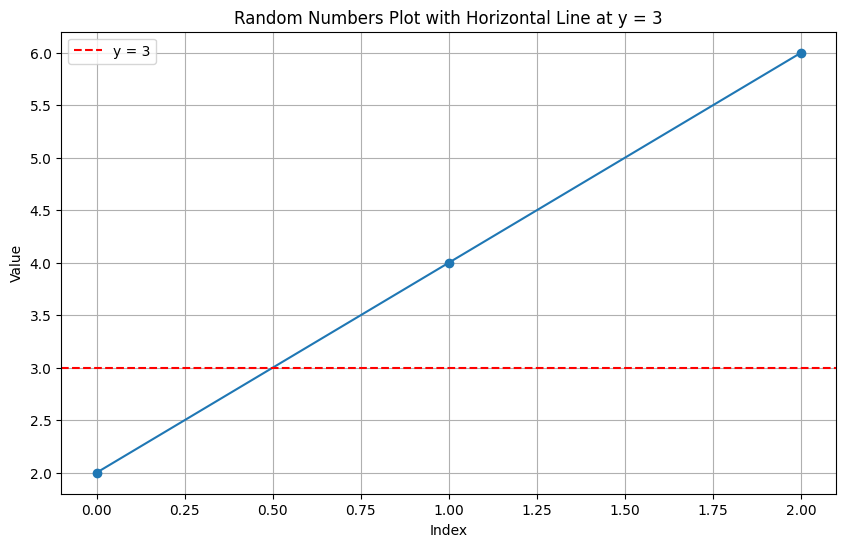

In [8]:
plot_law_of_large_numbers(3)

numbers mean 3.6


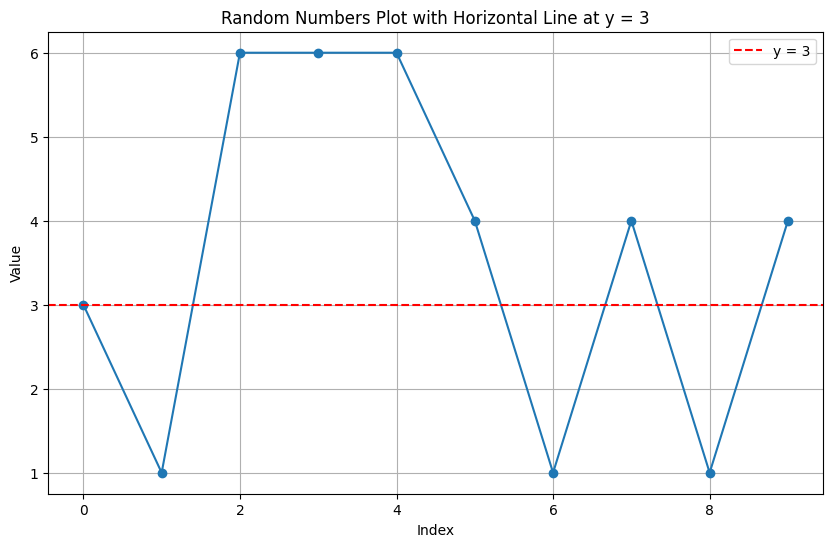

In [9]:
plot_law_of_large_numbers(10)

numbers mean 3.35


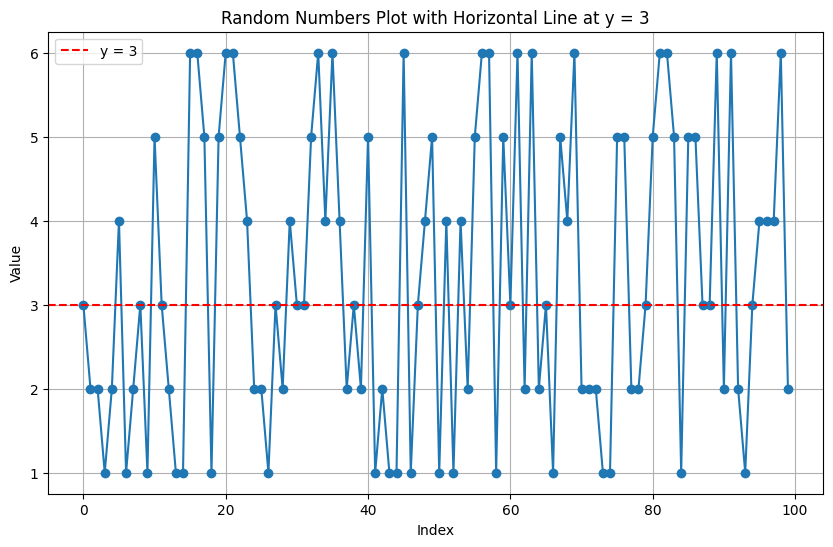

In [10]:
plot_law_of_large_numbers(100)

numbers mean 3.451


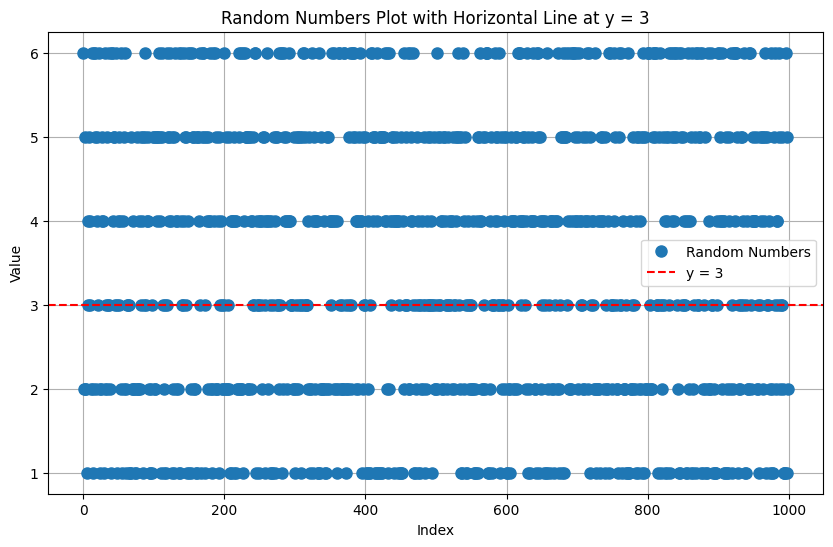

In [11]:
plot_law_of_large_numbers(1000)

### Exercise 

Write a function that proves the law of large numbers. One solution would be writing a function that returns
a number with a probability of 0.5. You can then run it a few times, average the result and then run it many times, averaging the result. If the many times version is closer to the expected probability, this is some evidence that the law of large numbers is more correct

In [14]:
EXPECTED_AVG = 0.5

small_num_simulations = 1
small_num_flips = 5

large_num_simulations = 1000
large_num_flips = 1000  

In [15]:
def simulate_coin_flips(num_flips):
    coin_flips = np.random.choice(['H', 'T'], size=num_flips)  # 'H' for heads, 'T' for tails
    num_heads = np.sum(coin_flips == 'H')
    proportion_heads = num_heads / num_flips
    return proportion_heads

def test_law_of_large_numbers(num_simulations, num_flips):
    average_proportions = []
    for _ in range(num_simulations):
        proportion_heads = simulate_coin_flips(num_flips)
        average_proportions.append(proportion_heads)
    
    average_result = np.mean(average_proportions)
    return average_result

average_result_small = test_law_of_large_numbers(small_num_simulations, small_num_flips)
print(f"Average proportion of heads (small sample): {average_result_small}")

average_result_large = test_law_of_large_numbers(large_num_simulations, large_num_flips)
print(f"Average proportion of heads (large sample): {average_result_large}")

Average proportion of heads (small sample): 0.2
Average proportion of heads (large sample): 0.500197


In [367]:
assert abs(average_result_large - EXPECTED_AVG) < abs(average_result_small - EXPECTED_AVG)

In [19]:
for i in range(100):
    
    average_result_small = test_law_of_large_numbers(small_num_simulations, small_num_flips)
    average_result_large = test_law_of_large_numbers(large_num_simulations, large_num_flips)
        
    assert abs(average_result_large - EXPECTED_AVG) < abs(average_result_small - EXPECTED_AVG)

## Central Limit Thoerem

The central limit theorem states that if I take enough samples of any distribution, even if its not a normal one, and calculate a mean for each sample, these means, will distribute normally.

### Exercise

Prove this theory! 
1. Create a dataset which is not random (feel free to ask a chat for that). Plot it, see that its not normally distributed.  
2. Write code that samples the data randomlly, and calculate each samples's mean.
3. Take all of these samples means and plot their mean. Is it normally distributed? 
4. Start with a small sample, for example 5, plot it. See the result. Move to 50 samples. Is it better? how about a 100?

### Solution

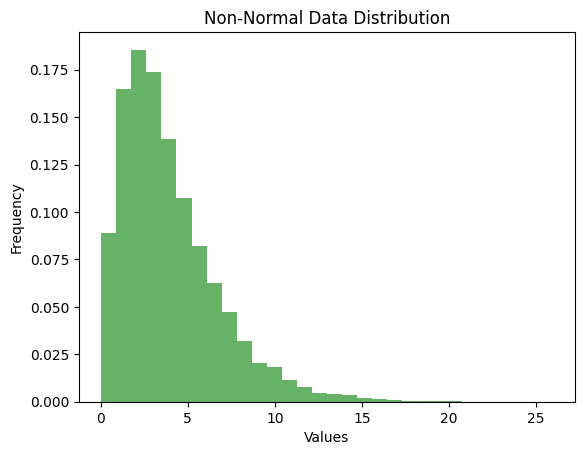

In [20]:
np.random.seed(0)
non_normal_data = np.random.gamma(shape=2, scale=2, size=10000)

plt.hist(non_normal_data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Non-Normal Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

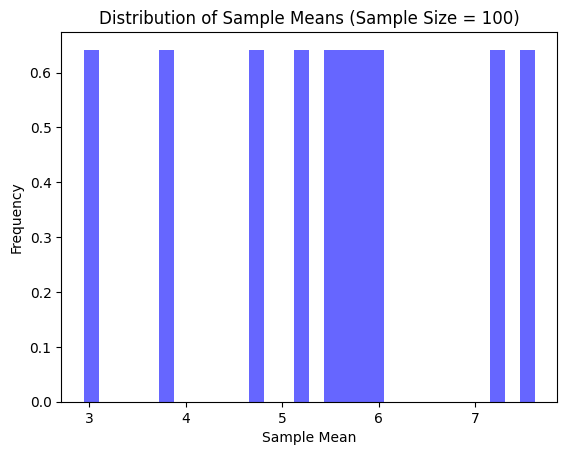

In [24]:
sample_size = 5
num_samples = 10

sample_means = np.zeros(num_samples)

for i in range(num_samples):
    sample = np.random.choice(non_normal_data, size=sample_size, replace=False)
    sample_means[i] = np.mean(sample)

plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution of Sample Means (Sample Size = 100)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

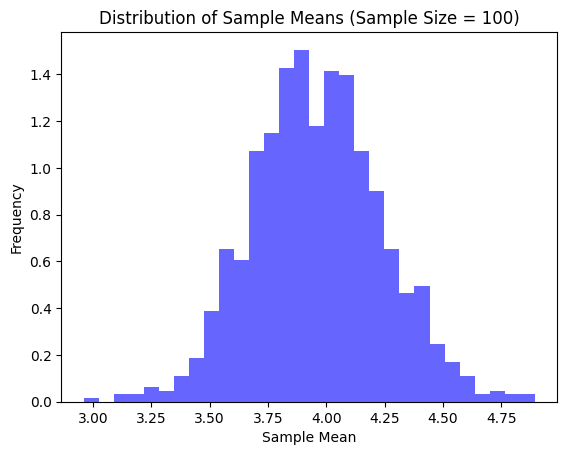

In [21]:
sample_size = 100
num_samples = 1000

sample_means = np.zeros(num_samples)

for i in range(num_samples):
    sample = np.random.choice(non_normal_data, size=sample_size, replace=False)
    sample_means[i] = np.mean(sample)

plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution of Sample Means (Sample Size = 100)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# Calculating Probability

## Exclusive Events, Overlapping Events & the Addition Rule

### Exclusive Events

Exclusive events can't happen together. It either rains, or it doesn't. We need to make sure we understand what it means to rain (one drop? Rains for one second is enough?). If thats the case, lets take a simpler example, rolling a die. Can I roll a 1 and a 6 at the same time? I can't. Can I roll a 3 and an odd number at the same time? I can.

When an event is exclusive, the probability of A <b> and </b> B is 0

$$
P(A \cap B) = 0
$$

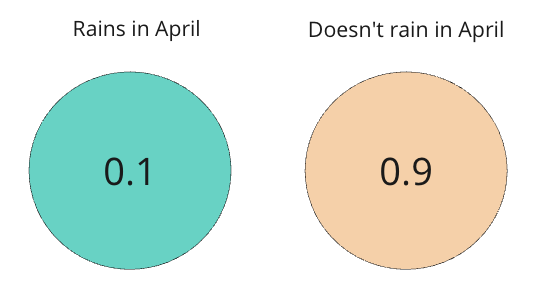

### Overlapping Events

Overlapping events are events that share at least one reuslt. For example if I roll a die. What's my chance of rolling a 3? 1/6. What is my chance of rolling an odd number? 1/2. I can roll 1, 3, or 5. 3 options. One of them, overlapps with the first event.

When an event is exclusive, the probability of A <b> or </b> B is not necessarily 0

$$
P(A \cap B) \neq 0
$$

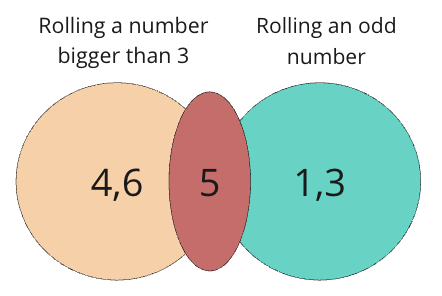

### The Addition Rule

The addition rule helps us calculate probability of some event <b> OR </b> some other event of happening, but not both. For example, rolling a number and another number in a fair die.


$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

### Exercise

Write a function that calculates the addition rule. The function should calculate the chance of a fair die to roll an odd number <b> OR </b> a number bigger than 3.

What is the result you expect to get?

* Hint: it might be easier to calculate the 1 - (probability of the oppositve. An odd number AND greater than 3)

In [25]:
def probability_odd_or_greater_than_3():

    total_outcomes = 6
    possible_numbers_bigger_than_3 = [4, 5, 6]
    possible_odd_numbers = [1, 3, 5]
    possible_bigger_than_3_and_odd = [5]
    
    prob_getting_num_bigger_than_3 = len(possible_numbers_bigger_than_3) / total_outcomes
    prob_getting_odd_number = len(possible_odd_numbers) / total_outcomes
    prob_getting_bigger_than_3_and_odd = len(possible_bigger_than_3_and_odd) / total_outcomes
    
    p_a = prob_getting_num_bigger_than_3
    p_b = prob_getting_odd_number
    p_a_and_b = prob_getting_bigger_than_3_and_odd
    
    
    return p_a + p_b - p_a_and_b

In [26]:
probability_odd_or_greater_than_3()

0.8333333333333334

## Conditional Probability

### The Multiplication Rule - Independent Events

The addition rule helps us calculate the probably of some event <b> and </b> some other event of happening. To understand how to use the multiplication rule we must first decide whether the events are conditional or non conditional. A non conditional situation is when the two events are non dependent on each other, For example, rolling a 1 and then rolling a 3

The chances of rolling a 1 and then a 3 are described in the following formula:


$$
P(A \cap B) = P(A) * P(B)
$$

The chance of rolling a 1 is 1/6. The chance of rolling a 3 is the same. The chance of rolling a 1 then a 3, is 1/6 * 1/6 which is 1/36. Its a lower chance of getting each event by itself.

### The Multiplication Rule - Dependent Events

Events are dependent if the occurrence of event A affects the probability of event B. For example, what is the chance of Macabi Tel Aviv winning against Real Madrid? 0.1. Not great. What is the chance of Macabi winning against Real Madrid assuming the score is 10-0 to Tel-Aviv? Much higher, lets say 0.95.

The event (winning) is dependent on the event (goals in the game)

$$
P(A \cap B) = P(A) \cdot P(B|A)
$$


How do we know if an event is dependent or non dependent? If 
$$
P(B|A) = P(B)
$$


Then the events are unrelated

For example, what is the chance of randomlly pulling an ace from a deck of cards? There are 4 aces, 52 cards, so its 4/52, which is 0.08. Now I pull another card, what is the act that is going to decide whether the next card pulling is dependent or non dependent? How can I affect the probability of pulling another Ace?

### Solution

By either returning or not returning, the ace to the deck. If I return the card to the deck, the probabilities stay exactly the same, 4/52. If I dont return it, the chance of me getting another ace is 3/53 which is 6%. It's a lower chance. 

### Exercise

Write a function that calculates the chance of getting a certain card in a normal cards deck given the events are conditional or non conditional.

The function arguments should be:
1. Number of cards in the deck
2. Amount of specific cards we want to pick
3. Do we return after picking
4. how many times do we pick the next card

In [27]:
OUT_OF_CARDS_ERR = 'out of cards'

def calculate_prob_picking_specific_card(num_total_items: int, amount_of_specific_items: int, with_return: bool,
                                          num_picks: int) -> float:
    independent_prob = amount_of_specific_items / num_total_items
    calculated_prob = None
    dependent_prob = 1
    picks_idx = 1

    for pick in range(num_picks):
        
        if with_return is True:
            
            if calculated_prob is None:
                calculated_prob = independent_prob
                
            else:
                calculated_prob = calculated_prob * independent_prob                
                
        if with_return is False:
            
            if num_picks > amount_of_specific_items:
                return OUT_OF_CARDS_ERR
            
            if calculated_prob is None:
                calculated_prob = independent_prob
                
            else:
                dependent_prob = (amount_of_specific_items - picks_idx) / (num_total_items - picks_idx)
                calculated_prob *= dependent_prob
                picks_idx +=1
                
                
    return calculated_prob

In [28]:
assert calculate_prob_picking_specific_card(6, 1, False, 1) == 1/6

In [29]:
assert calculate_prob_picking_specific_card(52, 4, False, 2) == 4 / 52 * 3 / 51

In [30]:
assert calculate_prob_picking_specific_card(52, 4, False, 5) == OUT_OF_CARDS_ERR

### Exercise

What is the probabily of the following events?

1. tossing a coin once and getting head.
2. tossing a coin twice, getting head and then tail.
3. tossing a coin 3 times - getting head, head, and either head or tail.
4. Tossing a coin getting either head or tail, then tail

1 - 0.5

2 - 0.25

3 - 0.25

4 - 0.5

## Bayes Theorem

Somewhat alike to the multiplication rule for dependent events, the bayes theorem helps us calculate the probability of an event happening, given another one has happened. In contrary to the multiplicaiton rule we do not calculate the probability of two events happening together, but one event, given that something else has already happened.

$$
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
$$


### Exercise

Let's say we choose 2 football teams from our league. Team 1 wins 50% of the time. Team 2 wins 10% percent of the time. Team 1 played twice as many games as team 2.

Given a team has won, what is the chance it was team 2?. 

Event B - a team has won.

Event A - the team that played is team 2

P(A|B) - Given a team has won (B), what is the chance it was team 2 (A)?

The result is around 9%

### Solution

P(A) = 0.33 - The random chance of picking a random game that was played by team 2. As team A plays 1/3 of the games, this is the chance.

P(B|A) = 0.1. Given team 2 has played, what is their chance of winning? 10%

P(B) = 0.33 * 0.1 + 0.66 * 0.5

In [184]:
(0.1 * 0.33) / 0.363

0.09090909090909091